In [1]:
from pylab import *
import scipy
import ruptures as rpt
%matplotlib inline

In [2]:
import mat2python
data,trial,classes=mat2python.mat2python(repetition_number=0)
#sampling rate 10 Hz

 I am loading the 0 repetition of the protocol


# Plotting the signal

Select the oxy data in the region of interest

In [71]:
oxy=data[:,0:52]
roi1=list(array([46,47,48])-1)#python indexes starts from 0
roi2=list(array([18,28,29])-1)
roi3=list(array([13, 23, 24])-1)

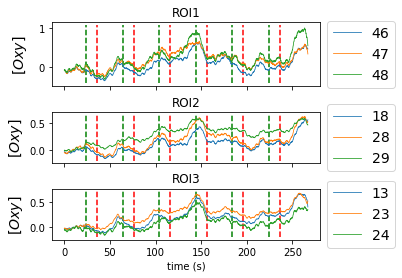

In [81]:
fig,axes=subplots(3,1,sharex=True)
t=arange(0,len(oxy))*0.1#it converts frame in time

#------------ROI1------------------
axes[0].plot(t,oxy[:,roi1],lw=0.8)
xmin,xmax,ymin,ymax=axes[0].axis()
axes[0].vlines(trial[::2]*0.1,ymin,ymax,linestyles="--",color="g")#start mental operation
axes[0].vlines(trial[1::2]*0.1,ymin,ymax,linestyles="--",color="r")#start pause
axes[0].set_title("ROI1")

# Shrink current axis by 20%
box = axes[0].get_position()
axes[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
axes[0].legend(array(roi1)+1,fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
axes[0].set_ylabel("$[Oxy]$",labelpad=10,fontsize=14)

#------------ROI2------------------
axes[1].plot(t,oxy[:,roi2],lw=0.8,label="ROI2")
xmin,xmax,ymin,ymax=axes[1].axis()
axes[1].vlines(trial[::2]*0.1,ymin,ymax,linestyles="--",color="g")#start mental operation
axes[1].vlines(trial[1::2]*0.1,ymin,ymax,linestyles="--",color="r")#start pause

# Shrink current axis by 20%
box = axes[1].get_position()
axes[1].set_position([box.x0, box.y0, box.width * 0.8, box.height*0.8])

# Put a legend to the right of the current axis
axes[1].legend(array(roi2)+1,fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
axes[1].set_ylabel("$[Oxy]$",fontsize=14)
axes[1].set_title("ROI2")

#------------ROI3------------------
axes[2].plot(t,oxy[:,roi3],lw=0.8,label="ROI3")
xmin,xmax,ymin,ymax=axes[2].axis()
axes[2].vlines(trial[::2]*0.1,ymin,ymax,linestyles="--",color="g")#start mental operation
axes[2].vlines(trial[1::2]*0.1,ymin,ymax,linestyles="--",color="r")#start pause

# Shrink current axis by 20%
box = axes[2].get_position()
axes[2].set_position([box.x0, box.y0, box.width * 0.8, box.height*0.8])

# Put a legend to the right of the current axis
axes[2].legend(array(roi3)+1,fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
axes[2].set_title("ROI3")
xlabel("time (s)")
axes[2].set_ylabel("$[Oxy]$",fontsize=14)
#savefig("./figure/time-series.pdf")


# Single changepoint detection

Find when the protocol begins. We consider the time up to the first rest ( the first red line).

In [120]:
#l2 model

algo = rpt.Dynp(model="l2").fit(signal)
#algo = rpt.Dynp(model="l2").fit(oxy[:trial[1],:])
l2_result = algo.predict(n_bkps=1)
#rpt.display(signal[:,1],trial[:2],l2_result)
algo = rpt.Dynp(model="normal").fit(signal)
norm_result = algo.predict(n_bkps=1)


In [122]:
print(l2_result[0],norm_result[0])

280 210


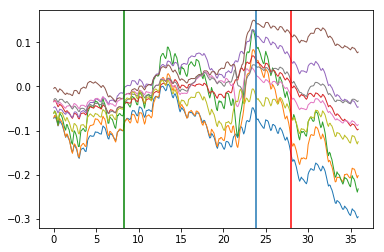

In [118]:
signal=oxy[:trial[1],roi1+roi2+roi3]
t_sign=arange(0,len(signal))*0.1
plot(t_sign,signal,lw=1)
axvline(trial[0]*0.1)
axvline(l2_result[0]*0.1,color="r")
axvline(83*0.1,color="g")#cusum

In [124]:
print(trial*0.1)
print(diff(trial)*.1)

[  23.8   36.    63.9   76.   103.9  116.   143.9  156.   183.9  196.
  223.9  236. ]
[ 12.2  27.9  12.1  27.9  12.1  27.9  12.1  27.9  12.1  27.9  12.1]


In [110]:
result

[225, 360]

In [101]:
len(oxy)

2671

In [13]:
trial[0]

238

In [15]:
rpt.display?

'xmin,xmax,ymin,ymax=gca().axis()\nvlines(trial[::2],ymin,ymax,linestyles="--",color="g")#start mental operation\nvlines(trial[1::2],ymin,ymax,linestyles="--",color="r")#start pause\nxlim(0,360)'

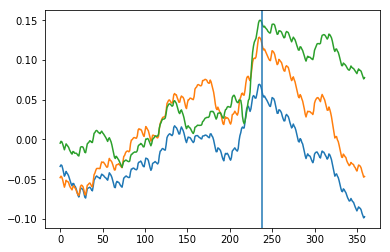

In [79]:
algo = rpt.Dynp(model="normal")


In [69]:
roi1+roi2+roi3 -1

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [67]:
shape(oxy[:,51])

(2671,)